In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving handloom sales.csv to handloom sales.csv


# visualization and inference

In [ ]:
data1 = pd.read_csv("handloom sales.csv")

In [ ]:
data1.head()

,id,year,state_name,state_code,type_residence,total_hh,male_weavers,male_allied_weavers,female_weavers,female_allied_weavers,...,sales_local_market,sales_master_weaver_group,sales_cooperative_society,sales_organized_fairs_or_exhibition,sales_export,sales_ecommerce,sales_other_sources,members_cooperative_society,members_shg_or_joint_liability_group,hl_hh_members_of_producer_company
0,0,2019-20,Andaman and Nicobar Islands,35,Rural,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-20,Andaman and Nicobar Islands,35,Urban,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019-20,Andhra Pradesh,28,Rural,77065.0,46779.0,9086.0,31199.0,22712.0,...,20452.0,36622.0,21122.0,383.0,1395.0,54.0,2676.0,21622.0,17656.0,7269.0
3,3,2019-20,Andhra Pradesh,28,Urban,45579.0,30033.0,5132.0,19633.0,12854.0,...,12342.0,29811.0,4153.0,224.0,382.0,12.0,489.0,7107.0,5459.0,2246.0
4,4,2019-20,Arunachal Pradesh,12,Rural,84014.0,10885.0,8184.0,60335.0,5778.0,...,73523.0,275.0,6.0,11.0,12.0,19.0,10451.0,4922.0,7025.0,1276.0


In [ ]:
data1.shape

(72, 96)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 96 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   id                                                            72 non-null     int64  
 1   year                                                          72 non-null     object 
 2   state_name                                                    72 non-null     object 
 3   state_code                                                    72 non-null     int64  
 4   type_residence                                                72 non-null     object 
 5   total_hh                                                      62 non-null     float64
 6   male_weavers                                                  62 non-null     float64
 7   male_allied_weavers                                           62 non-null

In [ ]:
data1.isna().sum()

id                                       0
year                                     0
state_name                               0
state_code                               0
type_residence                           0
                                        ..
sales_ecommerce                         10
sales_other_sources                     10
members_cooperative_society             10
members_shg_or_joint_liability_group    10
hl_hh_members_of_producer_company       10
Length: 96, dtype: int64

In [ ]:
def fill_missing_with_median(data, column):
    median = data1[column].median()
    data1[column].fillna(median, inplace=True)

numerical_columns = data1.select_dtypes(include='float64').columns

for col in numerical_columns:
    fill_missing_with_median(data1, col)



In [ ]:
data1.isna().sum()

id                                      0
year                                    0
state_name                              0
state_code                              0
type_residence                          0
                                       ..
sales_ecommerce                         0
sales_other_sources                     0
members_cooperative_society             0
members_shg_or_joint_liability_group    0
hl_hh_members_of_producer_company       0
Length: 96, dtype: int64

# merging cols


In [ ]:
data1['loan'] = data1[['loan_from_cooperative_societies',
                 'loan_from_commercial_banks',
                 'loan_from_friends_or_relatives',
                 'loan_from_govt',
                 'loan_from_master_weaver',
                 'loan_from_money_lender',
                 'loan_from_other_sources',
                 'loan_from_shg']].sum(axis=1)



In [ ]:
data1['sales'] = data1[['sales_local_market', 'sales_master_weaver_group'
,'sales_cooperative_society','sales_organized_fairs_or_exhibition','sales_export','sales_ecommerce','sales_other_sources' ]].sum(axis=1)

print(data1['sales'])


0       5497.0
1       5497.0
2      82704.0
3      47413.0
4      84297.0
        ...   
67     45380.0
68      6412.0
69      5028.0
70    514919.0
71     76711.0
Name: sales, Length: 72, dtype: float64


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 98 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   id                                                            72 non-null     int64  
 1   year                                                          72 non-null     object 
 2   state_name                                                    72 non-null     object 
 3   state_code                                                    72 non-null     int64  
 4   type_residence                                                72 non-null     object 
 5   total_hh                                                      72 non-null     float64
 6   male_weavers                                                  72 non-null     float64
 7   male_allied_weavers                                           72 non-null

# plots

## Total Sales vs Different Dye Types

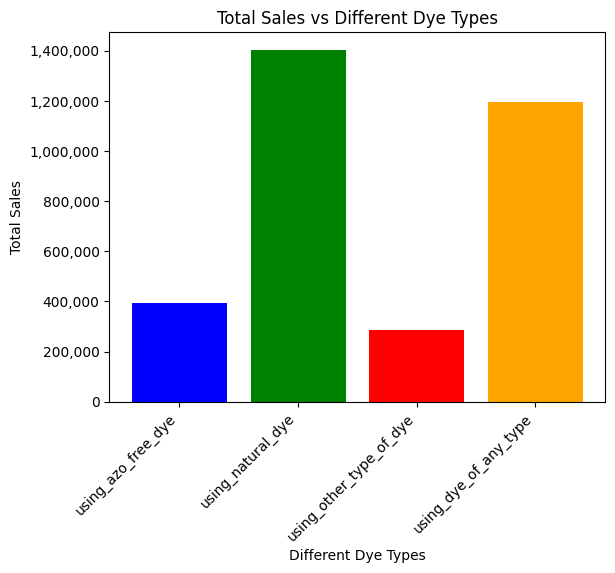

In [ ]:
import matplotlib.pyplot as plt

# Selecting the columns corresponding to indices 33 to 48 and the 'sales' column
dye_sales = data1.iloc[:, 82:86].sum()

# Define colors for each bar
colors = ['blue', 'green', 'red', 'orange']

# Plotting the bar graph with specified colors
plt.bar(range(len(dye_sales)), dye_sales, color=colors)

# Adding labels and title
plt.ylabel("Total Sales")
plt.xlabel("Different Dye Types")
plt.title("Total Sales vs Different Dye Types")

# Assuming the indices 82 to 86 represent the column names, you can label the x-axis with these names
dye_labels = data1.columns[82:86]
plt.xticks(range(len(dye_labels)), dye_labels, rotation=45, ha='right')

# Format y-axis ticks without scientific notation
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Display the plot
plt.show()


Inference: Handlooms that use natural dye have the highest amount of sales

In [ ]:
data1['sales'].max()

1335318.0

## Total Sales vs Different Yarn Types

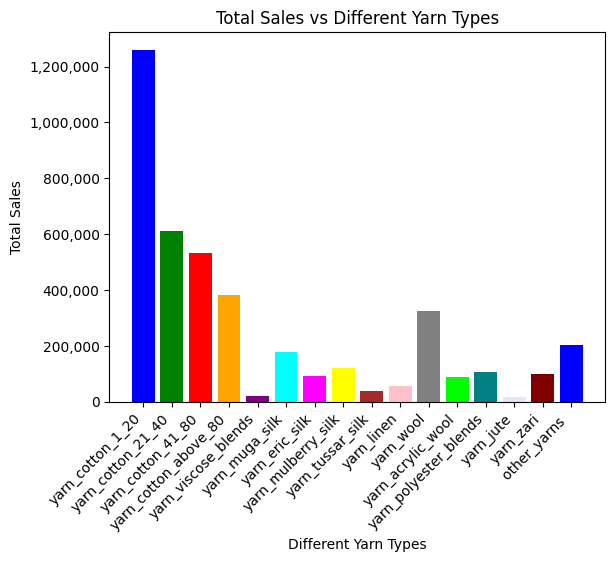

In [ ]:
import matplotlib.pyplot as plt

# Selecting the columns corresponding to indices 33 to 48 and the 'sales' column
yarn_sales = data1.iloc[:, 48:64].sum()

# Define colors for each bar
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink', 'grey', 'lime', 'teal', 'lavender', 'maroon']

# Plotting the bar graph with specified colors
plt.bar(range(len(yarn_sales)), yarn_sales, color=colors)

# Adding labels and title
plt.ylabel("Total Sales")
plt.xlabel("Different Yarn Types")
plt.title("Total Sales vs Different Yarn Types")

# Assuming the indices 48 to 64 represent the column names, you can label the x-axis with these names
yarn_labels = data1.columns[48:64]
plt.xticks(range(len(yarn_labels)), yarn_labels, rotation=45, ha='right')

# Format y-axis ticks without scientific notation
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Display the plot
plt.show()


Inference: yarn cotton 1/20 have the highest amount of sales

## Histogram that depicts that which type of dye has more frequent sales in a certain type of market

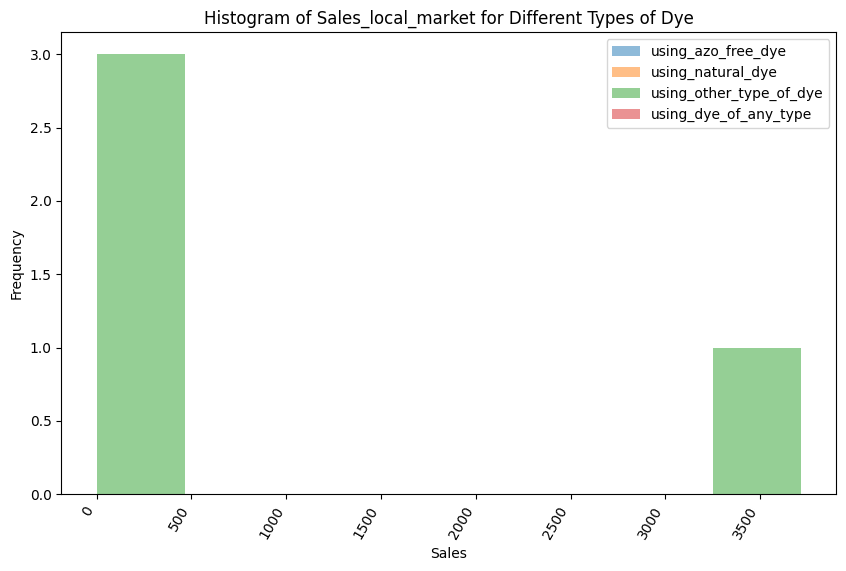

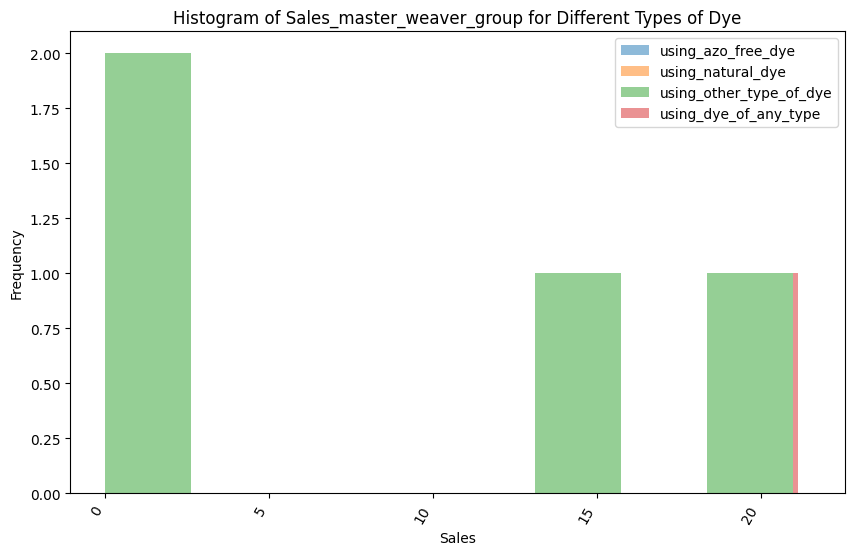

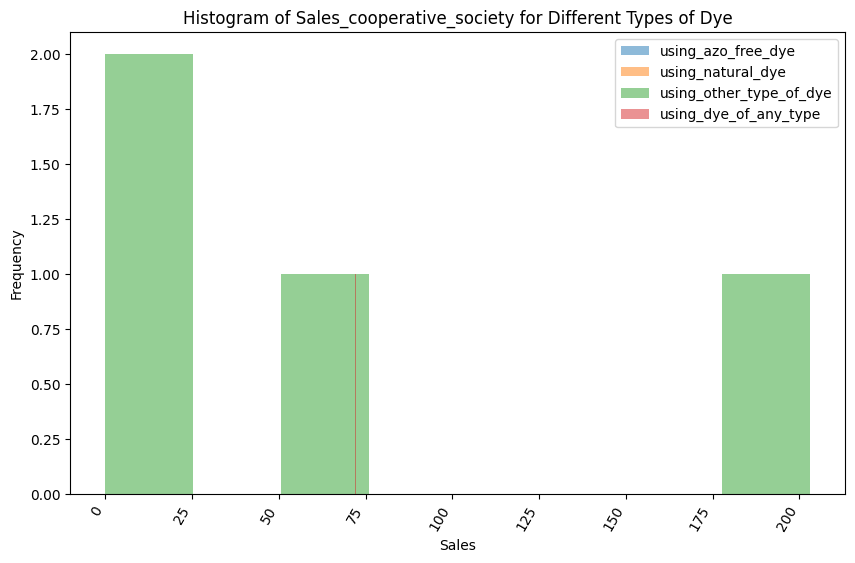

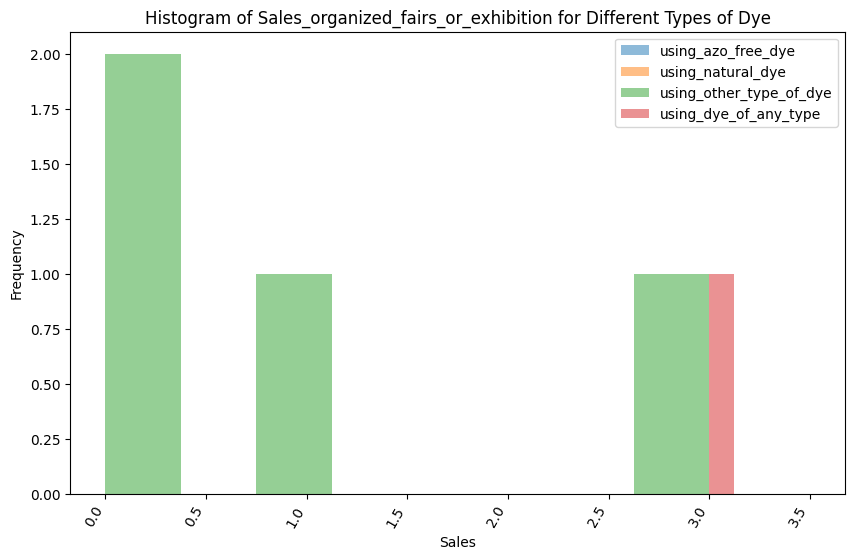

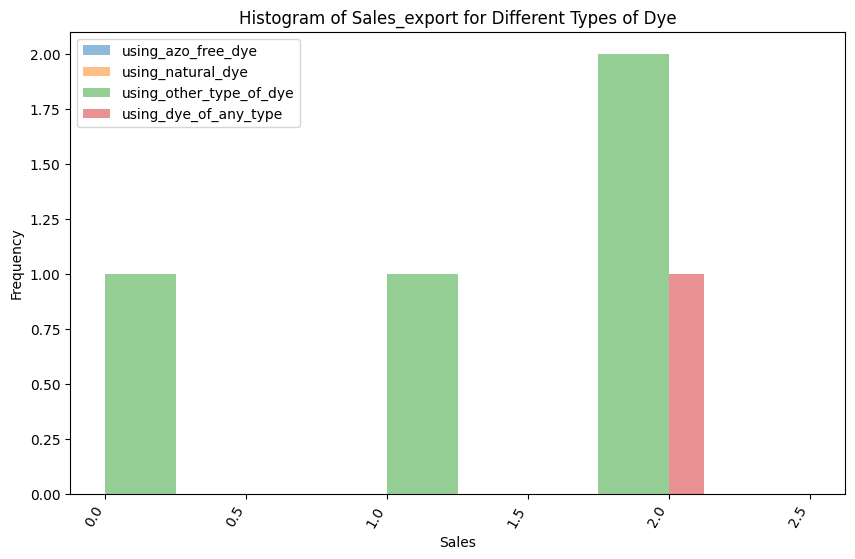

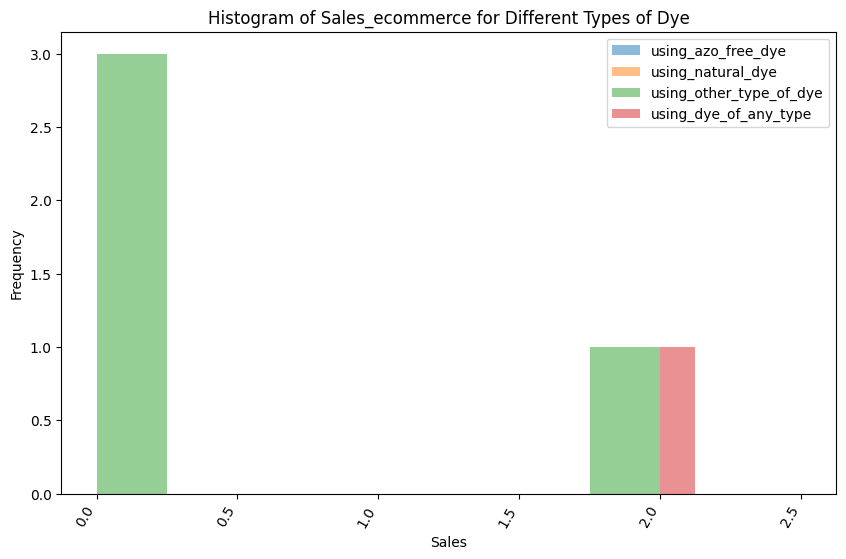

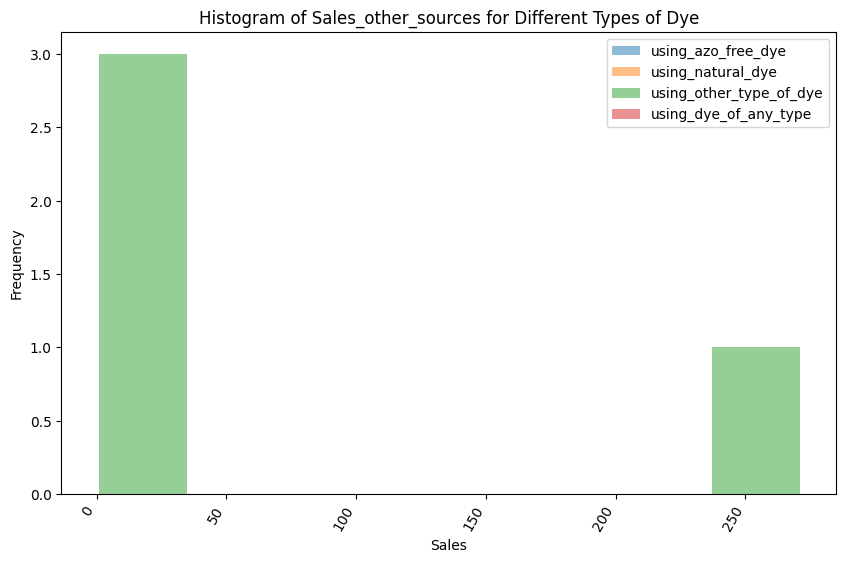

In [ ]:
import matplotlib.pyplot as plt

# List of sales columns
sales_columns = data1.columns[86:93]

# List of dye columns
dye_columns = data1.columns[82:86]

# Define a larger figure size to reduce label overlapping
plt.rcParams["figure.figsize"] = [10, 6]  # Adjust as needed

# Iterate over each sales column to create individual plots
for sale_column in sales_columns:
    plt.figure()  # Create a new figure for each plot

    # Plot histograms for each dye type
    for dye_column in dye_columns:
        # Filter data by dye and plot histogram
        filtered_data = data1[data1[dye_column] == 1][sale_column]
        plt.hist(filtered_data, bins=8, alpha=0.5, label=dye_column)

    # Set x and y-axis labels and plot title
    plt.xlabel("Sales")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {sale_column.capitalize()} for Different Types of Dye")

    # Set x-ticks with a large rotation angle to prevent overlap
    # Avoid setting a fixed range; let Matplotlib determine it
    plt.xticks(rotation=60, ha='right')  # You can increase the angle if needed

    # Ensure the legend displays correctly
    plt.legend()

    # Display the plot
    plt.show()


#we cannot tell from this graph how much more popular one dye type is over another....talks about sales distribution and dye popularity

## Graph depicting that which type of dye has more sales in different markets

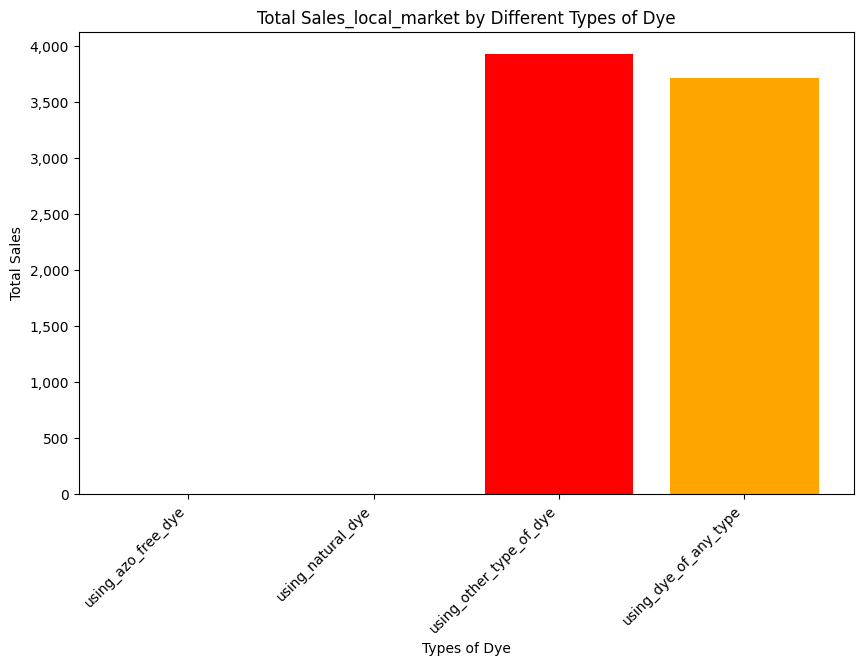

<Figure size 1000x800 with 0 Axes>

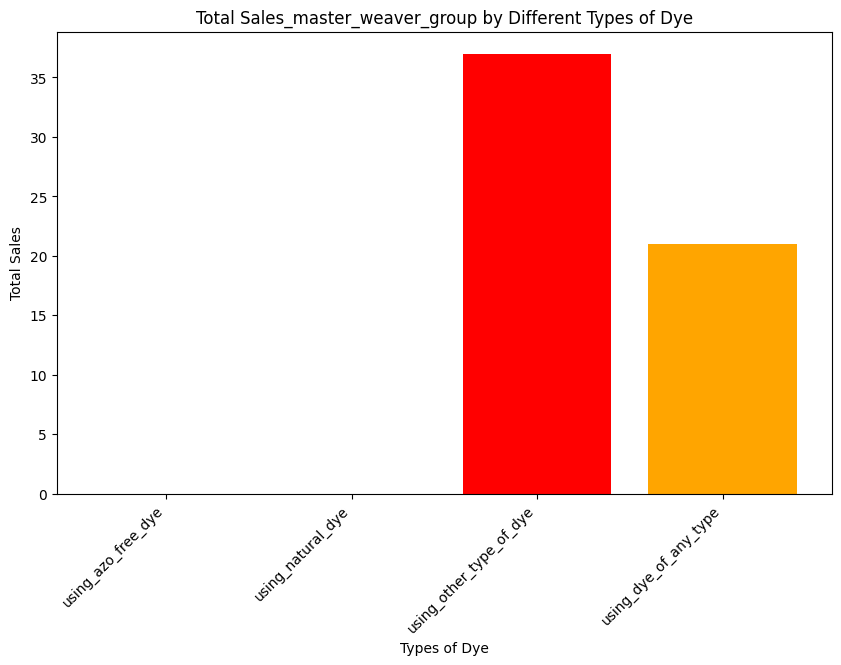

<Figure size 1000x800 with 0 Axes>

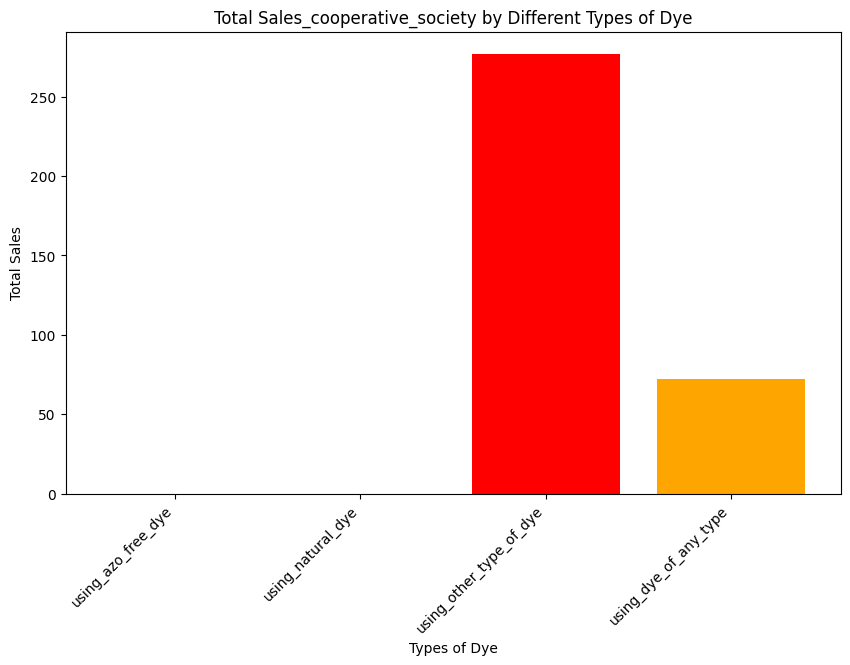

<Figure size 1000x800 with 0 Axes>

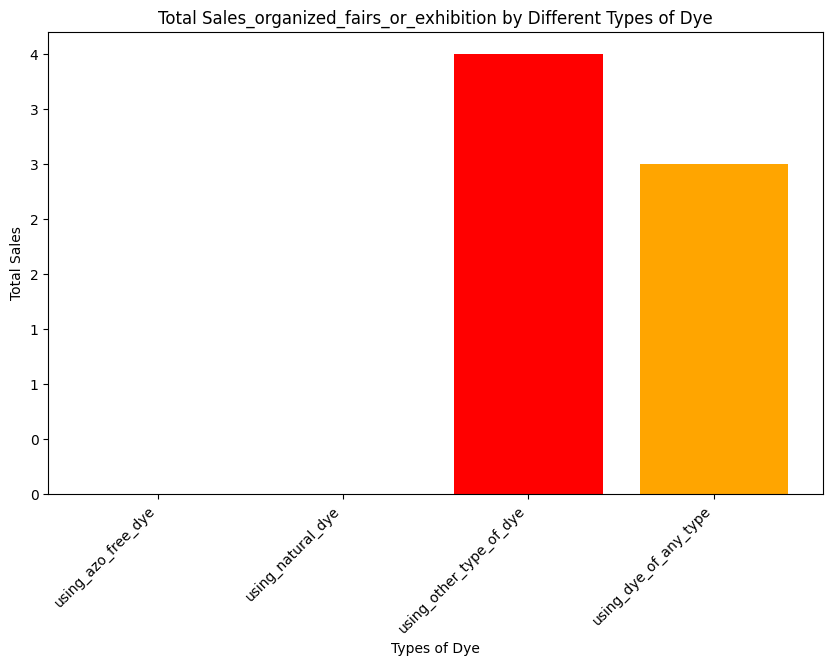

<Figure size 1000x800 with 0 Axes>

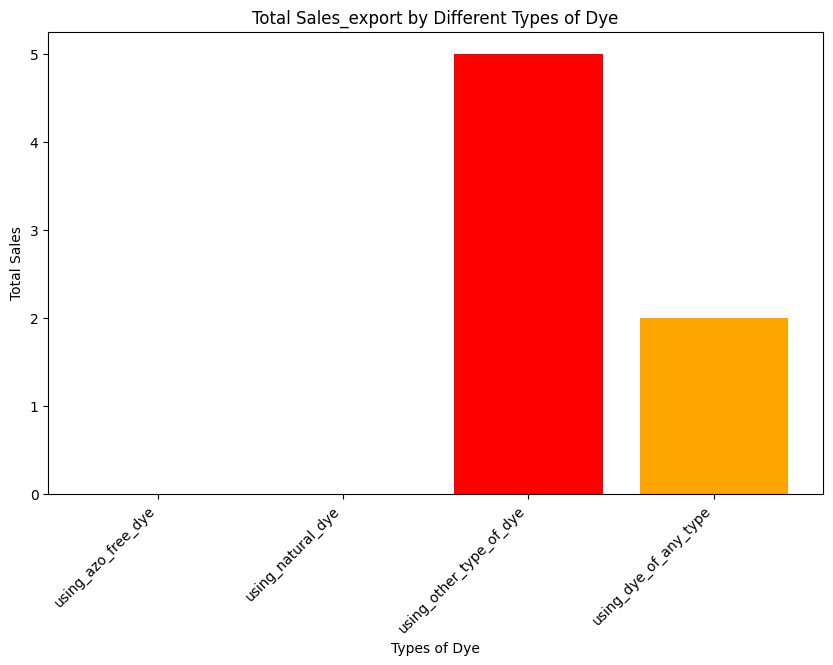

<Figure size 1000x800 with 0 Axes>

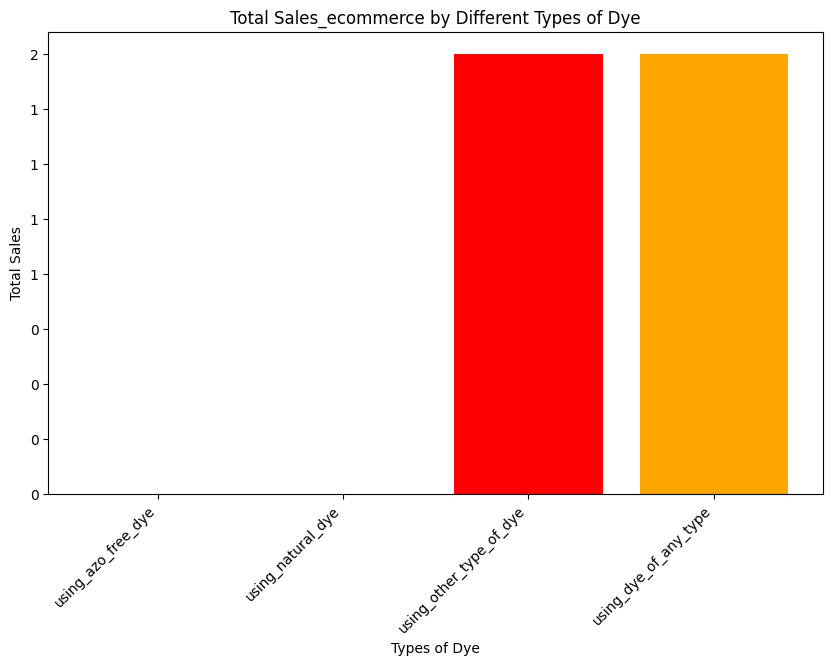

<Figure size 1000x800 with 0 Axes>

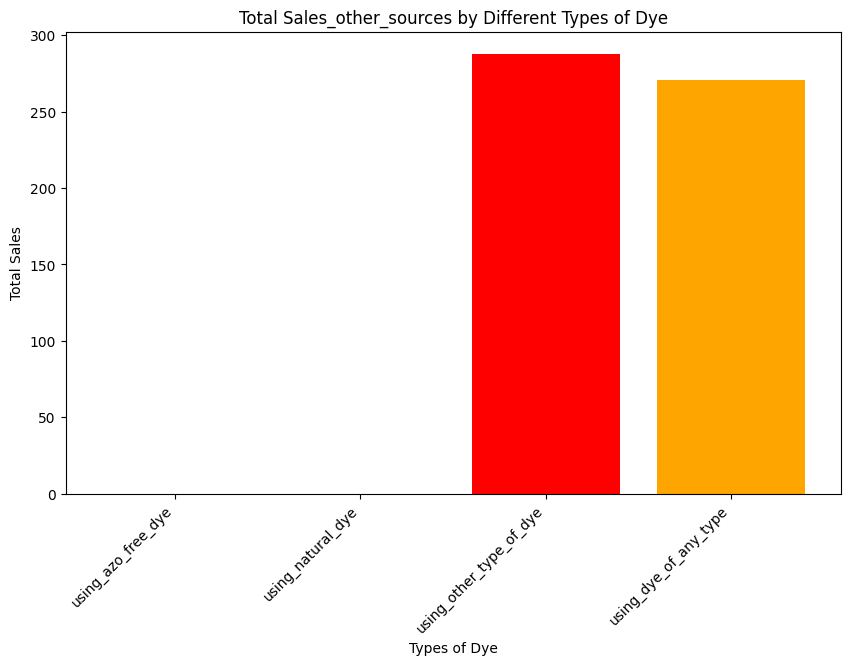

<Figure size 1000x800 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# List of sales columns
sales_columns = data1.columns[86:93]

# Define colors for the bar plots
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta']

# Iterate over each sales column and create a separate plot
for sale_column in sales_columns:
    plt.figure()  # Create a new figure for each plot
    total_sales_by_dye = []  # List to store total sales for each type of dye
    for dye_column, color in zip(data1.columns[82:86], colors):  # Using columns 82 to 85 for different types of dye
        # Summing up the sales for the current type of sale and type of dye
        total_sales = data1[data1[dye_column] == 1][sale_column].sum()
        total_sales_by_dye.append(total_sales)
        # Plotting the bar plot with specified color
        plt.bar(dye_column, total_sales, color=color)
    plt.xlabel("Types of Dye")
    plt.ylabel("Total Sales")
    plt.title(f"Total {sale_column.capitalize()} by Different Types of Dye")
    plt.xticks(rotation=45, ha='right')
    # Format y-axis ticks without scientific notation
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    plt.figure(figsize=(10, 8))
    plt.show()


In [ ]:
data1['income_less_5000_hl_related'].max()

1107105.0

## Scatter Plot depicting Distribution of handloom households in Loan for Each Type of Income

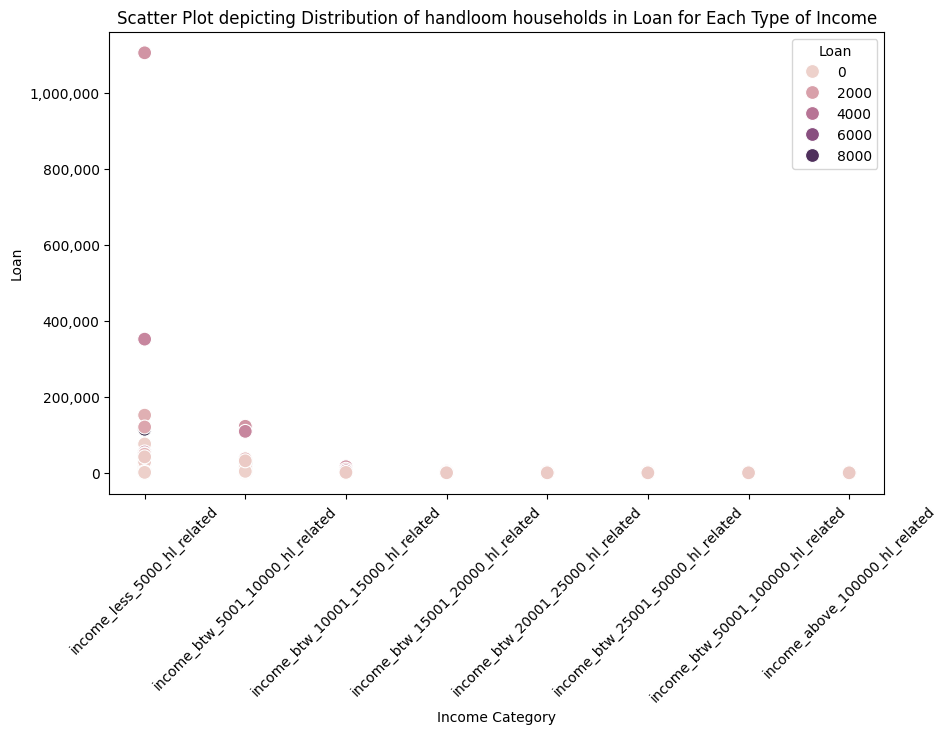

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of income-related columns
income_columns = ['income_less_5000_hl_related', 'income_btw_5001_10000_hl_related',
                  'income_btw_10001_15000_hl_related', 'income_btw_15001_20000_hl_related',
                  'income_btw_20001_25000_hl_related', 'income_btw_25001_50000_hl_related',
                  'income_btw_50001_100000_hl_related', 'income_above_100000_hl_related']

# Melt the DataFrame to long format for seaborn
data_melted = data1.melt(value_vars=income_columns, id_vars='loan', var_name='income_category')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income_category', y='value', data=data_melted, hue='loan', s=100)
plt.title('Scatter Plot depicting Distribution of handloom households in Loan for Each Type of Income')
plt.xlabel('Income Category')
plt.ylabel('Loan')
plt.xticks(rotation=45)
plt.legend(title='Loan', loc='upper right')
# Format y-axis ticks without scientific notation
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()


Inference: Handlooms with less than 5000 income take up more loans

## Graph that shows sales for different residence type

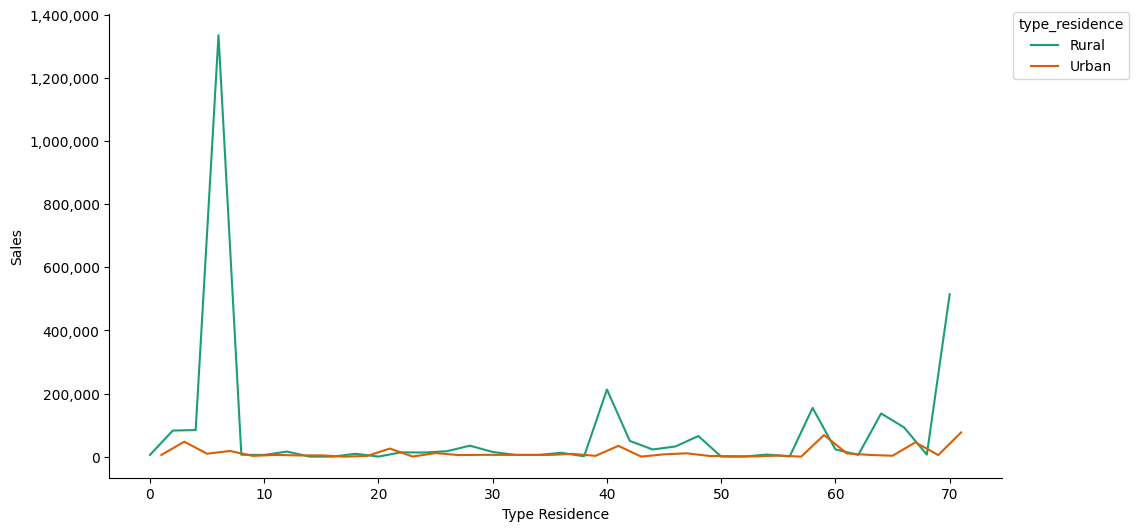

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, series_index=0): # function to plot a single series with a unique color and label
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series.index  # index represents 'type_residence'
    ys = series['sales']
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)
df_sorted = data1.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type_residence')):
    _plot_series(series, series_name, i)

# Move the legend outside the plot
fig.legend(title='type_residence', bbox_to_anchor=(1, 1), loc='upper left')

sns.despine(fig=fig, ax=ax)#Removes the top and right spines of the plot for a cleaner look
plt.xlabel('Type Residence')
plt.ylabel('Sales')
# Format y-axis ticks without scientific notation , format numbers with commas for thousands.
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()


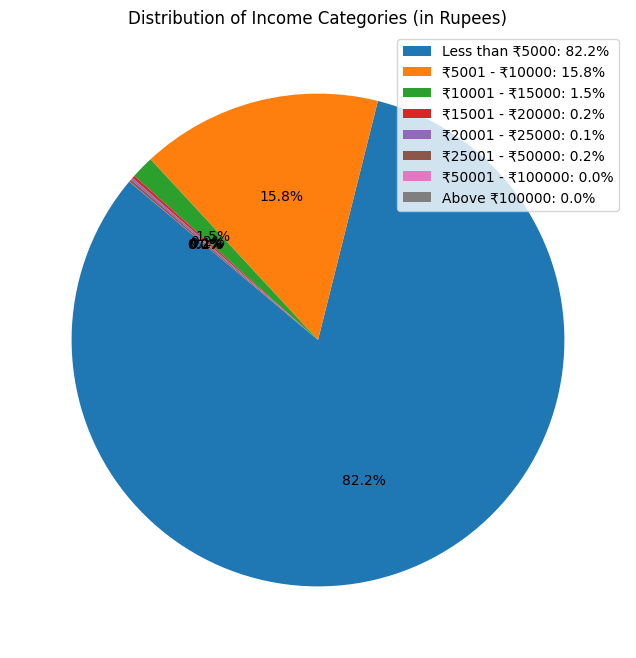

In [ ]:
import matplotlib.pyplot as plt

# List of income-related columns
income_columns = ['income_less_5000_hl_related', 'income_btw_5001_10000_hl_related',
                  'income_btw_10001_15000_hl_related', 'income_btw_15001_20000_hl_related',
                  'income_btw_20001_25000_hl_related', 'income_btw_25001_50000_hl_related',
                  'income_btw_50001_100000_hl_related', 'income_above_100000_hl_related']

# Calculate the total number of households for each income category
total_households = [data1[income_column].sum() for income_column in income_columns]

# Calculate the percentages
total = sum(total_households)
percentages = [households / total * 100 for households in total_households]

# Labels for each income category in rupees
labels = ['Less than ₹5000', '₹5001 - ₹10000', '₹10001 - ₹15000', '₹15001 - ₹20000',
          '₹20001 - ₹25000', '₹25001 - ₹50000', '₹50001 - ₹100000', 'Above ₹100000']

# Create a pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(percentages, labels=None, autopct='%1.1f%%', startangle=140)

# Create a custom legend with labels and percentages
plt.legend(labels=[f'{label}: {percent:.1f}%' for label, percent in zip(labels, percentages)], loc="upper right")

plt.title('Distribution of Income Categories (in Rupees)')
plt.show()


# Preprocessing

In [ ]:
data = pd.read_csv("handloom sales.csv")

In [ ]:
data.head()

,id,year,state_name,state_code,type_residence,total_hh,male_weavers,male_allied_weavers,female_weavers,female_allied_weavers,...,sales_local_market,sales_master_weaver_group,sales_cooperative_society,sales_organized_fairs_or_exhibition,sales_export,sales_ecommerce,sales_other_sources,members_cooperative_society,members_shg_or_joint_liability_group,hl_hh_members_of_producer_company
0,0,2019-20,Andaman and Nicobar Islands,35,Rural,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-20,Andaman and Nicobar Islands,35,Urban,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019-20,Andhra Pradesh,28,Rural,77065.0,46779.0,9086.0,31199.0,22712.0,...,20452.0,36622.0,21122.0,383.0,1395.0,54.0,2676.0,21622.0,17656.0,7269.0
3,3,2019-20,Andhra Pradesh,28,Urban,45579.0,30033.0,5132.0,19633.0,12854.0,...,12342.0,29811.0,4153.0,224.0,382.0,12.0,489.0,7107.0,5459.0,2246.0
4,4,2019-20,Arunachal Pradesh,12,Rural,84014.0,10885.0,8184.0,60335.0,5778.0,...,73523.0,275.0,6.0,11.0,12.0,19.0,10451.0,4922.0,7025.0,1276.0


In [ ]:
data.tail()

,id,year,state_name,state_code,type_residence,total_hh,male_weavers,male_allied_weavers,female_weavers,female_allied_weavers,...,sales_local_market,sales_master_weaver_group,sales_cooperative_society,sales_organized_fairs_or_exhibition,sales_export,sales_ecommerce,sales_other_sources,members_cooperative_society,members_shg_or_joint_liability_group,hl_hh_members_of_producer_company
67,67,2019-20,Uttar Pradesh,9,Urban,43708.0,28570.0,5079.0,14515.0,12432.0,...,16136.0,22567.0,5992.0,169.0,30.0,26.0,460.0,12735.0,546.0,1420.0
68,68,2019-20,Uttarakhand,5,Rural,6099.0,1760.0,260.0,3383.0,1628.0,...,5281.0,308.0,525.0,266.0,7.0,7.0,18.0,2794.0,754.0,171.0
69,69,2019-20,Uttarakhand,5,Urban,4997.0,1574.0,370.0,1249.0,2335.0,...,4774.0,31.0,193.0,19.0,0.0,3.0,8.0,4504.0,61.0,28.0
70,70,2019-20,West Bengal,19,Rural,467728.0,169809.0,59184.0,157318.0,164350.0,...,175204.0,261100.0,30331.0,8107.0,6766.0,3341.0,30070.0,23884.0,21741.0,6055.0
71,71,2019-20,West Bengal,19,Urban,74829.0,21090.0,12472.0,18433.0,28763.0,...,8998.0,62968.0,858.0,163.0,94.0,185.0,3445.0,7070.0,7877.0,5531.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 96 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   id                                                            72 non-null     int64  
 1   year                                                          72 non-null     object 
 2   state_name                                                    72 non-null     object 
 3   state_code                                                    72 non-null     int64  
 4   type_residence                                                72 non-null     object 
 5   total_hh                                                      62 non-null     float64
 6   male_weavers                                                  62 non-null     float64
 7   male_allied_weavers                                           62 non-null

In [ ]:
data.shape

(72, 96)

In [ ]:
# statistical analysis
data.describe()

,id,state_code,total_hh,male_weavers,male_allied_weavers,female_weavers,female_allied_weavers,transg_weaver,transg_allied_weaver,hh_antodaya_card,...,sales_local_market,sales_master_weaver_group,sales_cooperative_society,sales_organized_fairs_or_exhibition,sales_export,sales_ecommerce,sales_other_sources,members_cooperative_society,members_shg_or_joint_liability_group,hl_hh_members_of_producer_company
count,72.00000,72.000000,6.200000e+01,62.000000,62.000000,6.200000e+01,62.000000,62.000000,62.000000,62.000000,...,6.200000e+01,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.00000,62.000000,62.000000
mean,35.50000,19.166667,5.072321e+04,12244.338710,3493.290323,3.087902e+04,10190.096774,3.919355,4.048387,12535.258065,...,3.493798e+04,9594.209677,4779.790323,560.322581,204.709677,93.274194,4374.064516,6409.66129,4902.564516,1900.951613
std,20.92845,11.250039,1.693599e+05,26505.094955,8644.174258,1.318569e+05,27851.547574,15.721238,20.814896,58658.804211,...,1.498517e+05,34358.271981,13665.191173,2174.861230,913.271159,437.496498,17938.824288,14547.18628,20989.078196,5141.297481
min,0.00000,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,17.75000,9.750000,2.186250e+03,414.500000,119.250000,6.487500e+02,315.000000,0.000000,0.000000,125.500000,...,8.905000e+02,36.750000,39.250000,11.250000,2.000000,1.000000,37.250000,165.50000,47.000000,18.250000
50%,35.50000,18.500000,7.965500e+03,2083.000000,598.500000,3.089500e+03,1828.500000,0.000000,0.000000,738.500000,...,3.962500e+03,862.500000,307.000000,68.000000,7.500000,4.000000,285.500000,768.00000,408.500000,79.500000
75%,53.25000,29.250000,2.921725e+04,9486.000000,2779.250000,1.181700e+04,5685.500000,1.000000,1.000000,4156.250000,...,1.522900e+04,5013.000000,2950.500000,294.250000,49.750000,32.750000,1671.750000,4412.50000,1889.500000,1205.000000
max,71.00000,38.000000,1.252188e+06,169809.000000,59184.000000,1.021349e+06,164350.000000,120.000000,161.000000,445724.000000,...,1.162579e+06,261100.000000,92172.000000,15347.000000,6766.000000,3341.000000,137197.000000,85885.00000,163942.000000,32367.000000


In [ ]:
#checking the null / missing values
data.isnull().sum()

id                                       0
year                                     0
state_name                               0
state_code                               0
type_residence                           0
                                        ..
sales_ecommerce                         10
sales_other_sources                     10
members_cooperative_society             10
members_shg_or_joint_liability_group    10
hl_hh_members_of_producer_company       10
Length: 96, dtype: int64

In [ ]:
#checking duplicate values
data.duplicated().sum()

0

In [ ]:
data.dropna()

,id,year,state_name,state_code,type_residence,total_hh,male_weavers,male_allied_weavers,female_weavers,female_allied_weavers,...,sales_local_market,sales_master_weaver_group,sales_cooperative_society,sales_organized_fairs_or_exhibition,sales_export,sales_ecommerce,sales_other_sources,members_cooperative_society,members_shg_or_joint_liability_group,hl_hh_members_of_producer_company
2,2,2019-20,Andhra Pradesh,28,Rural,77065.0,46779.0,9086.0,31199.0,22712.0,...,20452.0,36622.0,21122.0,383.0,1395.0,54.0,2676.0,21622.0,17656.0,7269.0
3,3,2019-20,Andhra Pradesh,28,Urban,45579.0,30033.0,5132.0,19633.0,12854.0,...,12342.0,29811.0,4153.0,224.0,382.0,12.0,489.0,7107.0,5459.0,2246.0
4,4,2019-20,Arunachal Pradesh,12,Rural,84014.0,10885.0,8184.0,60335.0,5778.0,...,73523.0,275.0,6.0,11.0,12.0,19.0,10451.0,4922.0,7025.0,1276.0
5,5,2019-20,Arunachal Pradesh,12,Urban,9300.0,353.0,1295.0,6001.0,1757.0,...,9272.0,8.0,1.0,1.0,3.0,3.0,31.0,74.0,46.0,40.0
6,6,2019-20,Assam,18,Rural,1252188.0,75136.0,27592.0,1021349.0,142165.0,...,1162579.0,14017.0,2925.0,15347.0,2308.0,945.0,137197.0,53984.0,163942.0,32367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,67,2019-20,Uttar Pradesh,9,Urban,43708.0,28570.0,5079.0,14515.0,12432.0,...,16136.0,22567.0,5992.0,169.0,30.0,26.0,460.0,12735.0,546.0,1420.0
68,68,2019-20,Uttarakhand,5,Rural,6099.0,1760.0,260.0,3383.0,1628.0,...,5281.0,308.0,525.0,266.0,7.0,7.0,18.0,2794.0,754.0,171.0
69,69,2019-20,Uttarakhand,5,Urban,4997.0,1574.0,370.0,1249.0,2335.0,...,4774.0,31.0,193.0,19.0,0.0,3.0,8.0,4504.0,61.0,28.0
70,70,2019-20,West Bengal,19,Rural,467728.0,169809.0,59184.0,157318.0,164350.0,...,175204.0,261100.0,30331.0,8107.0,6766.0,3341.0,30070.0,23884.0,21741.0,6055.0


# dropping unnecessary cols


In [ ]:
# Dropping the unnecessary columns
data = data.drop(columns=['male_allied_weavers', 'female_allied_weavers', 'transg_weaver',	'transg_allied_weaver'], axis=1, inplace=False)


In [ ]:
data = data.drop(columns=['members_cooperative_society','members_shg_or_joint_liability_group','hl_hh_members_of_producer_company'], axis=1, inplace=False)


In [ ]:
data = data.drop(columns=['semi_pucca_house', 'pucca_house', 'kacha_house'], inplace=False)

In [ ]:
data = data.drop(columns=['hh_antodaya_card','hh_no_anotadaya_card'], axis=1, inplace=False)


In [ ]:
data = data.drop(columns=['input_dyed_yarn_open_market','input_dyed_yarn_master_weavers_group','input_dyed_yarn_cooperative_society','input_dyed_yarn_national_or_state_handloom_development_corp','input_dyed_yarn_khadi_village_industries_commission','input_dyed_yarn_other_types_of_dyed_yarn'], axis=1, inplace=False)

In [ ]:
data = data.drop(columns=['source_dyes_chemicals_open_market','source_dyes_chemicals_master_weavers_group','source_dyes_chemicals_cooperative_society','source_dyes_chemicals_national_handloom_development_corp','source_dyes_chemicals_khadi_village_industries_commission','source_dyes_chemicals_other_types'], axis=1, inplace=False)

In [ ]:
data = data.drop(columns=['input_hank_yarn_open_market','input_hank_yarn_master_weavers_group','input_hank_yarn_cooperative_society','input_hank_yarn_national_handloom_development_corp','input_hank_yarn_khadi_village_industries_commission_or_board','input_other_types_of_hank_yarn'], axis=1, inplace=False)

In [ ]:
data = data.drop(columns=['own_residency','rent_residency','other_residency' ], axis=1, inplace=False)

In [ ]:
data = data.drop(columns=['income_above_100000','income_btw_50000_100000','income_btw_25001_50000','income_btw_20001_25000','income_btw_15001_20000','income_btw_10001_15000','income_btw_5001_and_10000','income_less_5000' ], axis=1, inplace=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   72 non-null     int64  
 1   year                                 72 non-null     object 
 2   state_name                           72 non-null     object 
 3   state_code                           72 non-null     int64  
 4   type_residence                       72 non-null     object 
 5   total_hh                             62 non-null     float64
 6   male_weavers                         62 non-null     float64
 7   female_weavers                       62 non-null     float64
 8   income_less_5000_hl_related          62 non-null     float64
 9   income_btw_5001_10000_hl_related     62 non-null     float64
 10  income_btw_10001_15000_hl_related    62 non-null     float64
 11  income_btw_15001_20000_hl_related 

# Merging cols

In [ ]:
data['loan'] = data[['loan_from_cooperative_societies',
                 'loan_from_commercial_banks',
                 'loan_from_friends_or_relatives',
                 'loan_from_govt',
                 'loan_from_master_weaver',
                 'loan_from_money_lender',
                 'loan_from_other_sources',
                 'loan_from_shg']].sum(axis=1)

print(data)


    id     year                   state_name  state_code type_residence  \
0    0  2019-20  Andaman and Nicobar Islands          35          Rural   
1    1  2019-20  Andaman and Nicobar Islands          35          Urban   
2    2  2019-20               Andhra Pradesh          28          Rural   
3    3  2019-20               Andhra Pradesh          28          Urban   
4    4  2019-20            Arunachal Pradesh          12          Rural   
..  ..      ...                          ...         ...            ...   
67  67  2019-20                Uttar Pradesh           9          Urban   
68  68  2019-20                  Uttarakhand           5          Rural   
69  69  2019-20                  Uttarakhand           5          Urban   
70  70  2019-20                  West Bengal          19          Rural   
71  71  2019-20                  West Bengal          19          Urban   

    total_hh  male_weavers  female_weavers  income_less_5000_hl_related  \
0        NaN           N

In [ ]:
data.drop(['loan_from_cooperative_societies',
            'loan_from_commercial_banks',
            'loan_from_friends_or_relatives',
            'loan_from_govt',
            'loan_from_master_weaver',
            'loan_from_money_lender',
            'loan_from_other_sources',
            'loan_from_shg'], axis=1, inplace=True)

In [ ]:
data['Sales'] = data[['sales_master_weaver_group','sales_cooperative_society','sales_organized_fairs_or_exhibition','sales_export','sales_ecommerce','sales_other_sources']].sum(axis=1)

print(data)


    id     year                   state_name  state_code type_residence  \
0    0  2019-20  Andaman and Nicobar Islands          35          Rural   
1    1  2019-20  Andaman and Nicobar Islands          35          Urban   
2    2  2019-20               Andhra Pradesh          28          Rural   
3    3  2019-20               Andhra Pradesh          28          Urban   
4    4  2019-20            Arunachal Pradesh          12          Rural   
..  ..      ...                          ...         ...            ...   
67  67  2019-20                Uttar Pradesh           9          Urban   
68  68  2019-20                  Uttarakhand           5          Rural   
69  69  2019-20                  Uttarakhand           5          Urban   
70  70  2019-20                  West Bengal          19          Rural   
71  71  2019-20                  West Bengal          19          Urban   

    total_hh  male_weavers  female_weavers  income_less_5000_hl_related  \
0        NaN           N

In [ ]:
data['Debt'] = data[['debt_due_to_hl','debt_due_to_other_purposes','debt_due_to_hl_and_other_purposes']].sum(axis=1)

print(data)


    id     year                   state_name  state_code type_residence  \
0    0  2019-20  Andaman and Nicobar Islands          35          Rural   
1    1  2019-20  Andaman and Nicobar Islands          35          Urban   
2    2  2019-20               Andhra Pradesh          28          Rural   
3    3  2019-20               Andhra Pradesh          28          Urban   
4    4  2019-20            Arunachal Pradesh          12          Rural   
..  ..      ...                          ...         ...            ...   
67  67  2019-20                Uttar Pradesh           9          Urban   
68  68  2019-20                  Uttarakhand           5          Rural   
69  69  2019-20                  Uttarakhand           5          Urban   
70  70  2019-20                  West Bengal          19          Rural   
71  71  2019-20                  West Bengal          19          Urban   

    total_hh  male_weavers  female_weavers  income_less_5000_hl_related  \
0        NaN           N

# Missing values

In [ ]:
data.isnull().any()

id                                     False
year                                   False
state_name                             False
state_code                             False
type_residence                         False
total_hh                                True
male_weavers                            True
female_weavers                          True
income_less_5000_hl_related             True
income_btw_5001_10000_hl_related        True
income_btw_10001_15000_hl_related       True
income_btw_15001_20000_hl_related       True
income_btw_20001_25000_hl_related       True
income_btw_25001_50000_hl_related       True
income_btw_50001_100000_hl_related      True
income_above_100000_hl_related          True
debt_due_to_hl                          True
debt_due_to_other_purposes              True
debt_due_to_hl_and_other_purposes       True
avg_hh_size                             True
yarn_cotton_1_20                        True
yarn_cotton_21_40                       True
yarn_cotto

In [ ]:
data[data.isnull().any(axis = 1)]

,id,year,state_name,state_code,type_residence,total_hh,male_weavers,female_weavers,income_less_5000_hl_related,income_btw_5001_10000_hl_related,...,sales_local_market,sales_master_weaver_group,sales_cooperative_society,sales_organized_fairs_or_exhibition,sales_export,sales_ecommerce,sales_other_sources,loan,Sales,Debt
0,0,2019-20,Andaman and Nicobar Islands,35,Rural,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,1,2019-20,Andaman and Nicobar Islands,35,Urban,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
10,10,2019-20,Chandigarh,4,Rural,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
11,11,2019-20,Chandigarh,4,Urban,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
32,32,2019-20,Ladakh,37,Rural,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
33,33,2019-20,Ladakh,37,Urban,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
34,34,2019-20,Lakshadweep,31,Rural,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
35,35,2019-20,Lakshadweep,31,Urban,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
62,62,2019-20,The Dadra And Nagar Haveli And Daman And Diu,38,Rural,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
63,63,2019-20,The Dadra And Nagar Haveli And Daman And Diu,38,Urban,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [ ]:
def fill_missing_with_median(data, column):
    median = data[column].median()
    data[column].fillna(median, inplace=True)

numerical_columns = data.select_dtypes(include='float64').columns

for col in numerical_columns:
    fill_missing_with_median(data,col)

In [ ]:
data.isnull().any()

id                                     False
year                                   False
state_name                             False
state_code                             False
type_residence                         False
total_hh                               False
male_weavers                           False
female_weavers                         False
income_less_5000_hl_related            False
income_btw_5001_10000_hl_related       False
income_btw_10001_15000_hl_related      False
income_btw_15001_20000_hl_related      False
income_btw_20001_25000_hl_related      False
income_btw_25001_50000_hl_related      False
income_btw_50001_100000_hl_related     False
income_above_100000_hl_related         False
debt_due_to_hl                         False
debt_due_to_other_purposes             False
debt_due_to_hl_and_other_purposes      False
avg_hh_size                            False
yarn_cotton_1_20                       False
yarn_cotton_21_40                      False
yarn_cotto

# Using Encoding Techniques

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data['type_residence']

0     Rural
1     Urban
2     Rural
3     Urban
4     Rural
      ...  
67    Urban
68    Rural
69    Urban
70    Rural
71    Urban
Name: type_residence, Length: 72, dtype: object

In [ ]:
le = LabelEncoder()
print(le)

data['type_residence_encoded'] = le.fit_transform(data['type_residence'])
print("Label Encoded 'type_residence':")
print(data['type_residence_encoded'])

LabelEncoder()
Label Encoded 'type_residence':
0     0
1     1
2     0
3     1
4     0
     ..
67    1
68    0
69    1
70    0
71    1
Name: type_residence_encoded, Length: 72, dtype: int64


# Normalisation


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()
data[numerical_columns] = min_max_scaler.fit_transform(data[numerical_columns])

In [ ]:
print(data)

    id     year                   state_name  state_code type_residence  \
0    0  2019-20  Andaman and Nicobar Islands          35          Rural   
1    1  2019-20  Andaman and Nicobar Islands          35          Urban   
2    2  2019-20               Andhra Pradesh          28          Rural   
3    3  2019-20               Andhra Pradesh          28          Urban   
4    4  2019-20            Arunachal Pradesh          12          Rural   
..  ..      ...                          ...         ...            ...   
67  67  2019-20                Uttar Pradesh           9          Urban   
68  68  2019-20                  Uttarakhand           5          Rural   
69  69  2019-20                  Uttarakhand           5          Urban   
70  70  2019-20                  West Bengal          19          Rural   
71  71  2019-20                  West Bengal          19          Urban   

    total_hh  male_weavers  female_weavers  income_less_5000_hl_related  \
0   0.006361      0.0122

# detecting outliers using z-score for the income columns

Identified Outliers:
    id     year      state_name  state_code type_residence   total_hh  \
6    6  2019-20           Assam          18          Rural  1252188.0   
70  70  2019-20     West Bengal          19          Rural   467728.0   
40  40  2019-20         Manipur          14          Rural   192431.0   
3    3  2019-20  Andhra Pradesh          28          Urban    45579.0   
2    2  2019-20  Andhra Pradesh          28          Rural    77065.0   
18  18  2019-20         Gujarat          24          Rural     8109.0   
59  59  2019-20      Tamil Nadu          33          Urban    65009.0   

    male_weavers  male_allied_weavers  female_weavers  female_allied_weavers  \
6        75136.0              27592.0       1021349.0               142165.0   
70      169809.0              59184.0        157318.0               164350.0   
40        7522.0               5176.0        176755.0                 5657.0   
3        30033.0               5132.0         19633.0                12854

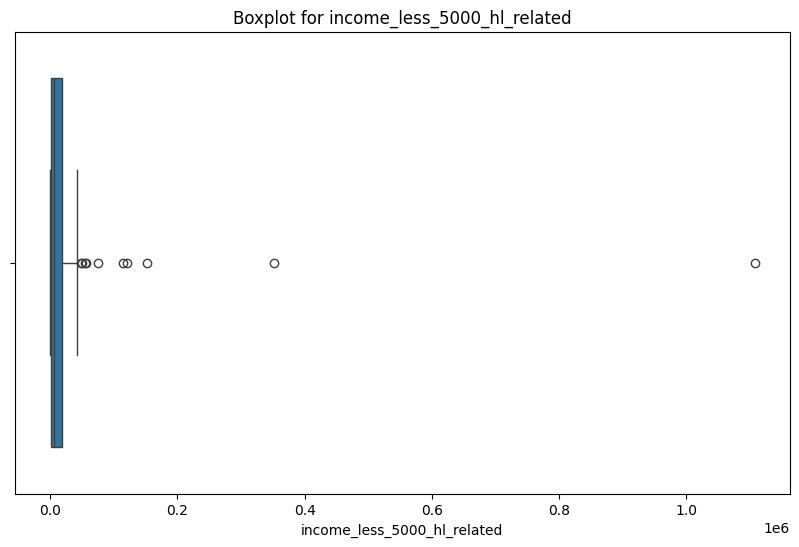

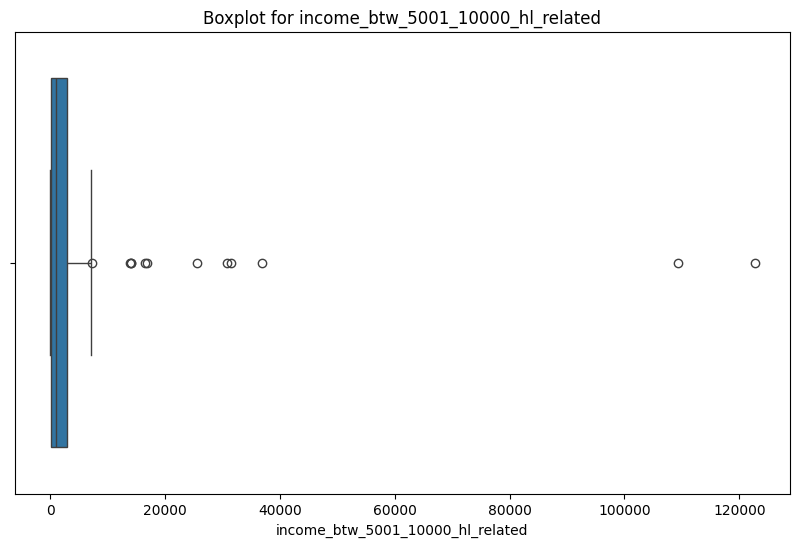

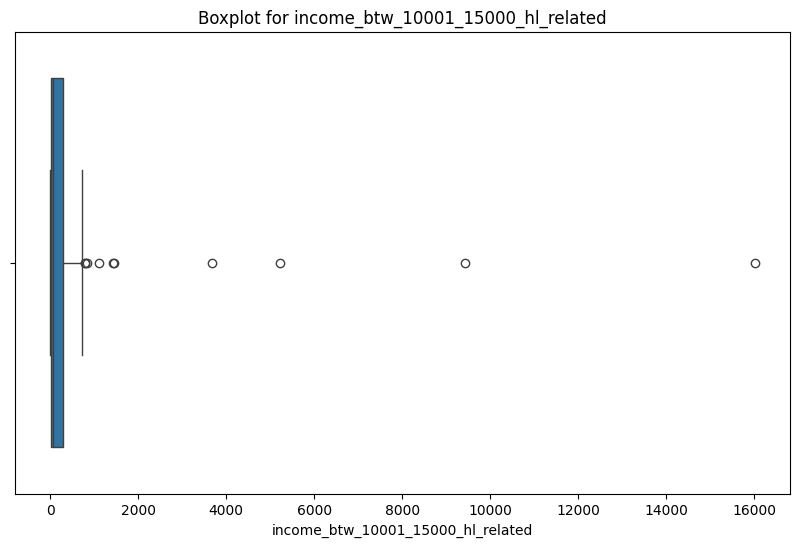

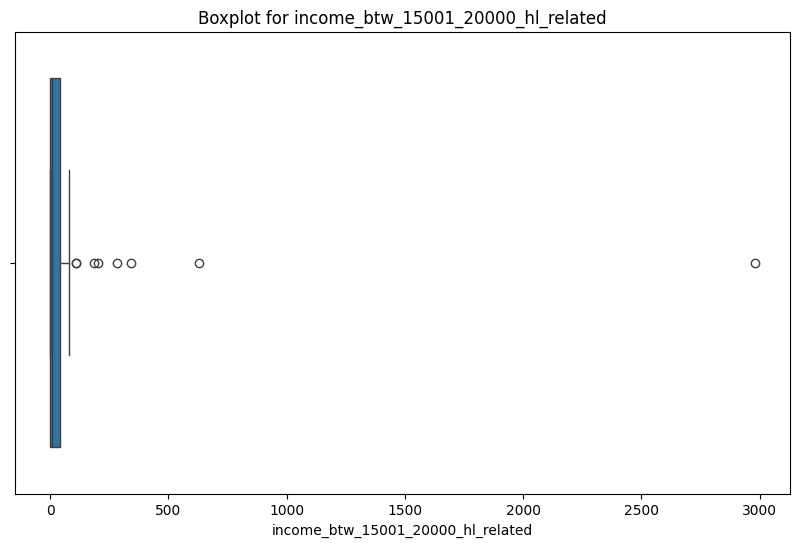

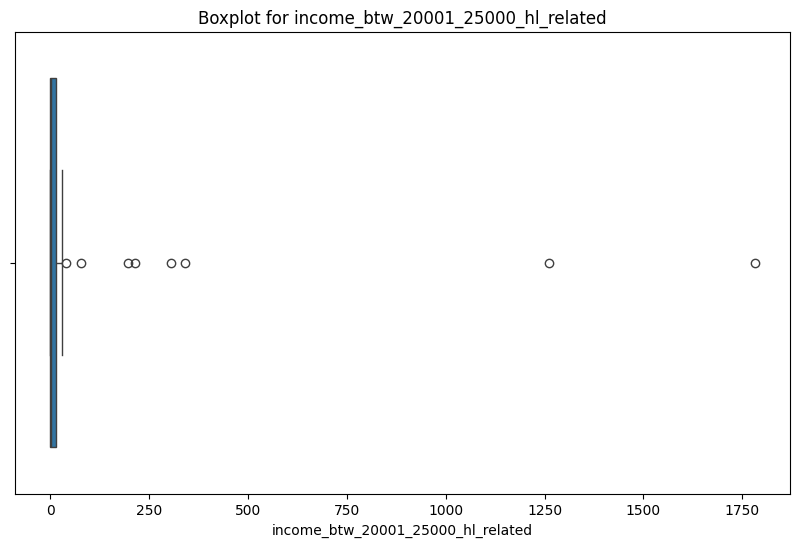

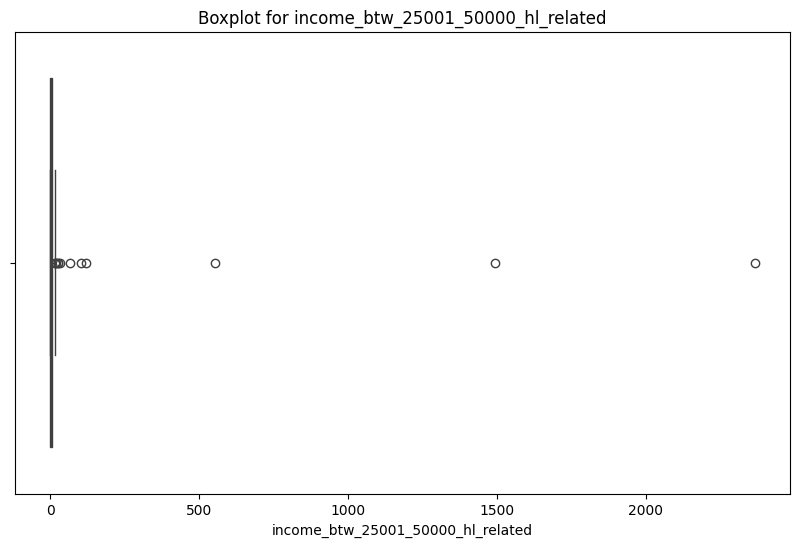

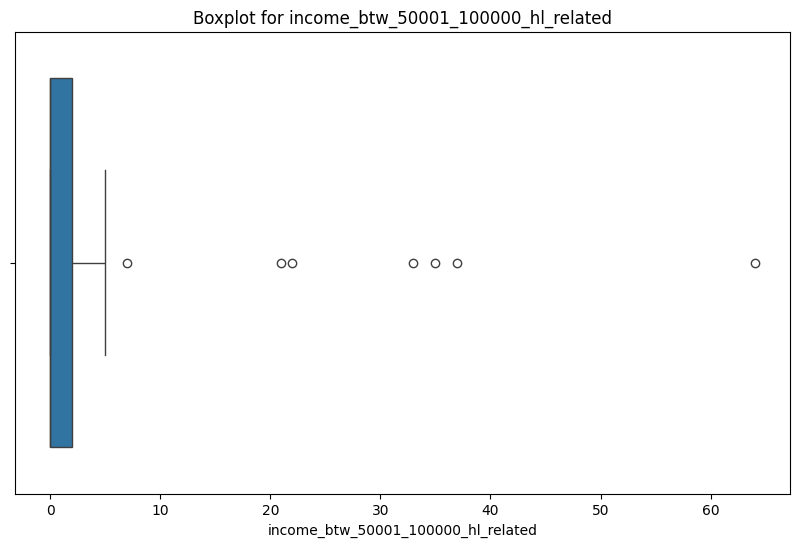

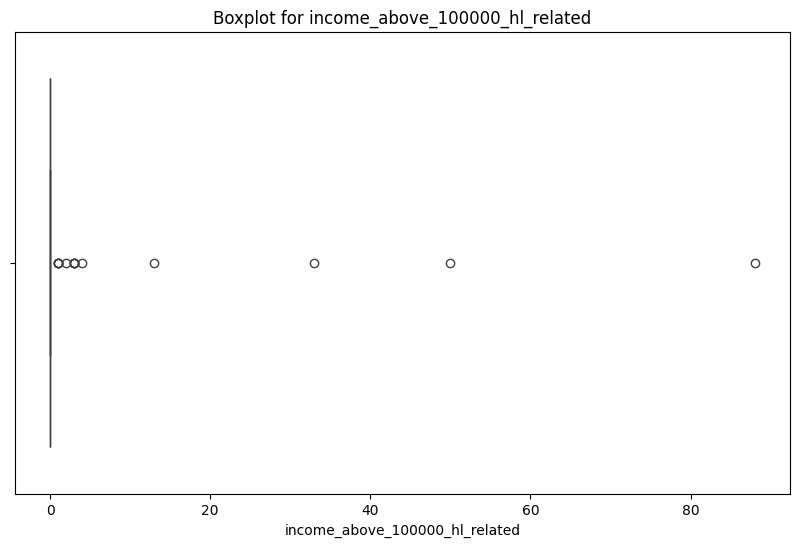

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate z-scores and identify outliers using StandardScaler
def calculate_zscores_and_outliers(data, columns, outlier_threshold=3):

    scaler = StandardScaler()


    for col in columns:
        data[f"{col}_zscore"] = scaler.fit_transform(data[[col]])


    outliers = pd.concat(
        [data[(data[f"{col}_zscore"].abs() > outlier_threshold)] for col in columns],
        axis=0
    ).drop_duplicates()

    return data, outliers

# Columns related to income
income_columns = [
    'income_less_5000_hl_related',
    'income_btw_5001_10000_hl_related',
    'income_btw_10001_15000_hl_related',
    'income_btw_15001_20000_hl_related',
    'income_btw_20001_25000_hl_related',
    'income_btw_25001_50000_hl_related',
    'income_btw_50001_100000_hl_related',
    'income_above_100000_hl_related'
]

data1, outliers = calculate_zscores_and_outliers(data1, income_columns)

# Display the outliers
print("Identified Outliers:")
print(outliers)

# Function to create boxplots for all income-related columns
def zcalplot():
    for col in income_columns:
        sns.boxplot(x=data1[col])
        plt.title(f"Boxplot for {col}")
        plt.show()

# Call the plotting function to create boxplots for all income-related columns
zcalplot()


# Correlation Analysis

In [ ]:
correlation = data[['Debt', 'loan']].corr(method='spearman')

print("Spearman Correlation between 'debt' and 'loan':")
print(correlation)

Spearman Correlation between 'debt' and 'loan':
          Debt      loan
Debt  1.000000  0.973579
loan  0.973579  1.000000


In [ ]:
columns_to_exclude = ['state_name', 'type_residence','year']
data_numeric = data.drop(columns=columns_to_exclude)

print("Data after excluding non-numeric columns:")
print(data_numeric.head())

Data after excluding non-numeric columns:
   id  state_code  total_hh  male_weavers  female_weavers  \
0   0          35  0.006361      0.012267        0.003025   
1   1          35  0.006361      0.012267        0.003025   
2   2          28  0.061544      0.275480        0.030547   
3   3          28  0.036399      0.176863        0.019223   
4   4          12  0.067094      0.064101        0.059074   

   income_less_5000_hl_related  income_btw_5001_10000_hl_related  \
0                     0.005333                          0.007973   
1                     0.005333                          0.007973   
2                     0.050343                          0.137396   
3                     0.023635                          0.134445   
4                     0.068579                          0.059340   

   income_btw_10001_15000_hl_related  income_btw_15001_20000_hl_related  \
0                           0.003591                           0.002685   
1                           0.00

In [ ]:
#dropping highly correlated features

correlation_matrix = data_numeric.corr()
high_corr_pairs = correlation_matrix.abs().stack().sort_values(ascending=False)

In [ ]:
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                           id    state_code  total_hh  \
id                                   1.000000  2.273182e-02 -0.049407   
state_code                           0.022732  1.000000e+00 -0.006597   
total_hh                            -0.049407 -6.597055e-03  1.000000   
male_weavers                         0.205288  7.135439e-02  0.632111   
female_weavers                      -0.115209 -2.006091e-02  0.975833   
income_less_5000_hl_related         -0.070509 -8.935672e-03  0.998090   
income_btw_5001_10000_hl_related     0.108940 -6.144962e-04  0.907607   
income_btw_10001_15000_hl_related   -0.038289  3.603339e-03  0.920986   
income_btw_15001_20000_hl_related   -0.130830  1.651341e-02  0.974151   
income_btw_20001_25000_hl_related   -0.218333  7.999576e-02  0.769043   
income_btw_25001_50000_hl_related   -0.272243  1.006556e-01  0.511779   
income_btw_50001_100000_hl_related  -0.049402  1.261867e-01  0.748238   
income_above_100000_hl_related 

In [ ]:
print("Highly Correlated Pairs:")
print(high_corr_pairs)

Highly Correlated Pairs:
id                                   id                                     1.000000e+00
debt_due_to_hl                       debt_due_to_hl                         1.000000e+00
yarn_muga_silk                       yarn_muga_silk                         1.000000e+00
yarn_viscose_blends                  yarn_viscose_blends                    1.000000e+00
yarn_cotton_above_80                 yarn_cotton_above_80                   1.000000e+00
                                                                                ...     
income_btw_5001_10000_hl_related     state_code                             6.144962e-04
sales_organized_fairs_or_exhibition  state_code                             2.040000e-04
state_code                           sales_organized_fairs_or_exhibition    2.040000e-04
                                     type_residence_encoded                 2.622493e-18
type_residence_encoded               state_code                             2.622493e

In [ ]:
income_columns = [
    'income_less_5000_hl_related',
    'income_btw_5001_10000_hl_related',
    'income_btw_10001_15000_hl_related',
    'income_btw_15001_20000_hl_related',
    'income_btw_20001_25000_hl_related',
    'income_btw_25001_50000_hl_related',
    'income_btw_50001_100000_hl_related',
    'income_above_100000_hl_related'
]

loan_income_corr = correlation_matrix.loc[income_columns,'loan']

print("Correlation between loan and income columns:")
print(loan_income_corr)

Correlation between loan and income columns:
income_less_5000_hl_related           0.337148
income_btw_5001_10000_hl_related      0.445820
income_btw_10001_15000_hl_related     0.401299
income_btw_15001_20000_hl_related     0.290815
income_btw_20001_25000_hl_related     0.243004
income_btw_25001_50000_hl_related     0.234088
income_btw_50001_100000_hl_related    0.628137
income_above_100000_hl_related        0.533534
Name: loan, dtype: float64


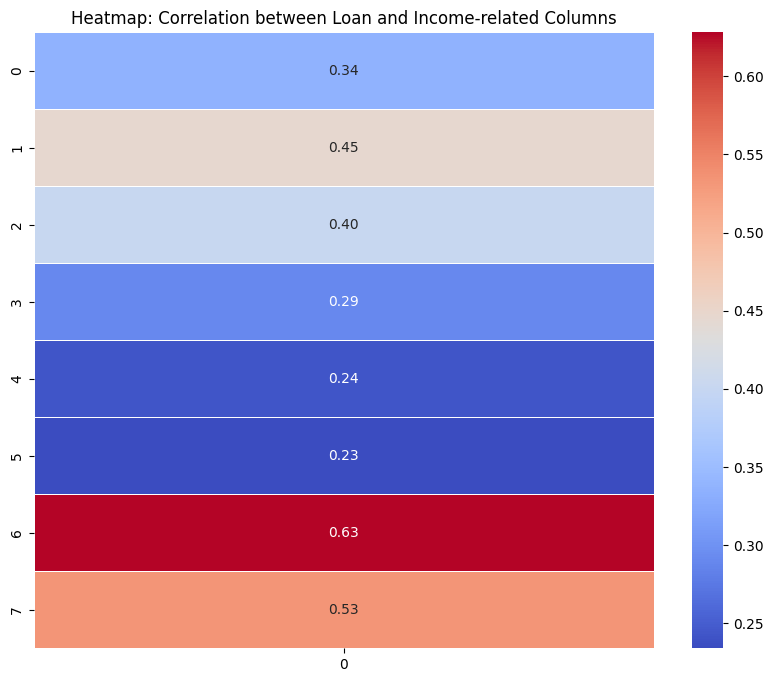

In [ ]:
loan_income_corr = loan_income_corr.values.reshape(-1, 1)

plt.figure(figsize=(10, 8))
sns.heatmap(loan_income_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=True)
plt.title("Heatmap: Correlation between Loan and Income-related Columns")
plt.show()

In [ ]:
income_columns = [
    'income_less_5000_hl_related',
    'income_btw_5001_10000_hl_related',
    'income_btw_10001_15000_hl_related',
    'income_btw_15001_20000_hl_related',
    'income_btw_20001_25000_hl_related',
    'income_btw_25001_50000_hl_related',
    'income_btw_50001_100000_hl_related',
    'income_above_100000_hl_related'
]

debt_income_corr = correlation_matrix.loc[income_columns,'Debt']

print("Correlation between Debt and income columns:")
print(debt_income_corr)

Correlation between Debt and income columns:
income_less_5000_hl_related           0.921939
income_btw_5001_10000_hl_related      0.798253
income_btw_10001_15000_hl_related     0.847611
income_btw_15001_20000_hl_related     0.917936
income_btw_20001_25000_hl_related     0.755495
income_btw_25001_50000_hl_related     0.547951
income_btw_50001_100000_hl_related    0.845827
income_above_100000_hl_related        0.921264
Name: Debt, dtype: float64


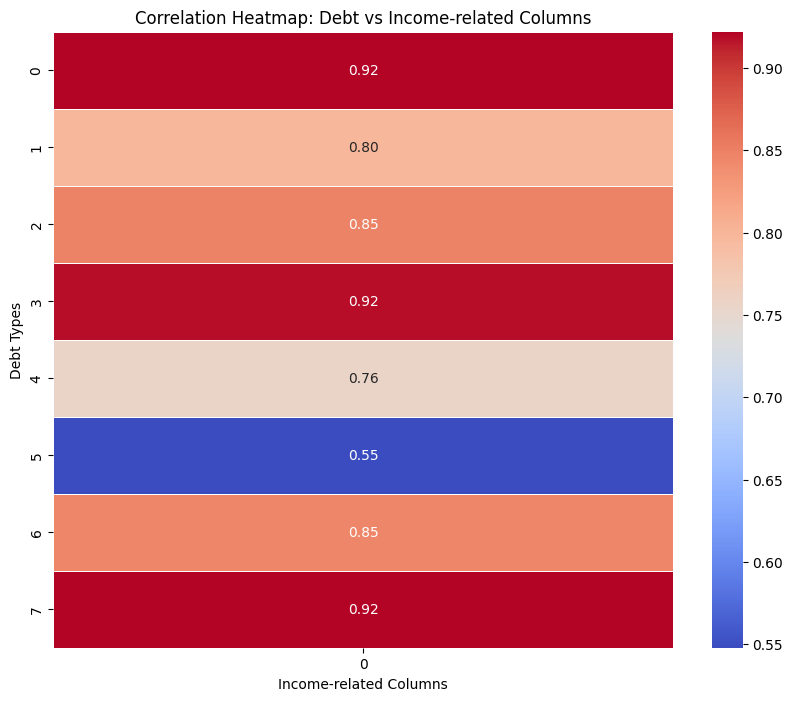

In [ ]:
debt_income_corr = debt_income_corr.values.reshape(-1, 1)

plt.figure(figsize=(10, 8))
sns.heatmap(debt_income_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=True)
plt.title("Correlation Heatmap: Debt vs Income-related Columns")
plt.xlabel("Income-related Columns")
plt.ylabel("Debt Types")
plt.show()

In [ ]:
0
debt_loan_corr = correlation_matrix.loc[
['debt_due_to_hl', 'debt_due_to_other_purposes', 'debt_due_to_hl_and_other_purposes'],'loan']

print("Debt and Loan Correlation:")
print(debt_loan_corr)

Debt and Loan Correlation:
debt_due_to_hl                       0.998930
debt_due_to_other_purposes           0.317447
debt_due_to_hl_and_other_purposes    0.807892
Name: loan, dtype: float64


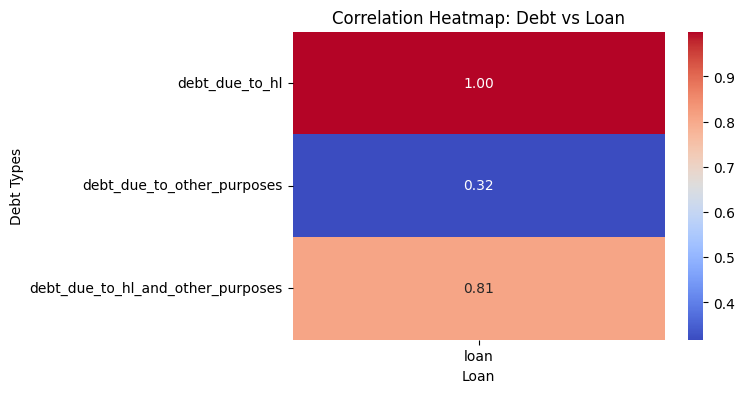

In [ ]:
debt_loan_corr_df = pd.DataFrame(debt_loan_corr, columns=['loan'])


plt.figure(figsize=(6, 4))
sns.heatmap(debt_loan_corr_df, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap: Debt vs Loan")
plt.xlabel("Loan")
plt.ylabel("Debt Types")
plt.show()

# decision tree


debt attribute

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 51 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   72 non-null     int64  
 1   year                                 72 non-null     object 
 2   state_name                           72 non-null     object 
 3   state_code                           72 non-null     int64  
 4   type_residence                       72 non-null     object 
 5   total_hh                             72 non-null     float64
 6   male_weavers                         72 non-null     float64
 7   female_weavers                       72 non-null     float64
 8   income_less_5000_hl_related          72 non-null     float64
 9   income_btw_5001_10000_hl_related     72 non-null     float64
 10  income_btw_10001_15000_hl_related    72 non-null     float64
 11  income_btw_15001_20000_hl_related 

# decision tree's goal to create a model that can classify data into debt categories based on the underlying patterns in the features

In [ ]:
data["Debt"].dtype

dtype('float64')

In [ ]:
debt_categories = pd.qcut(data['Debt'], 3, labels=["Low", "Medium", "High"])

In [ ]:
data['Debt_Category'] = debt_categories

In [ ]:
X = data.drop(['Debt', 'Debt_Category', 'state_name', 'type_residence', 'year'], axis=1)  # Features
y = data['Debt_Category']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
tree = DecisionTreeClassifier(max_depth = 5, random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [ ]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         2
         Low       0.67      1.00      0.80         6
      Medium       1.00      0.57      0.73         7

    accuracy                           0.80        15
   macro avg       0.89      0.86      0.84        15
weighted avg       0.87      0.80      0.79        15



In [ ]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2 0 0]
 [0 6 0]
 [0 3 4]]


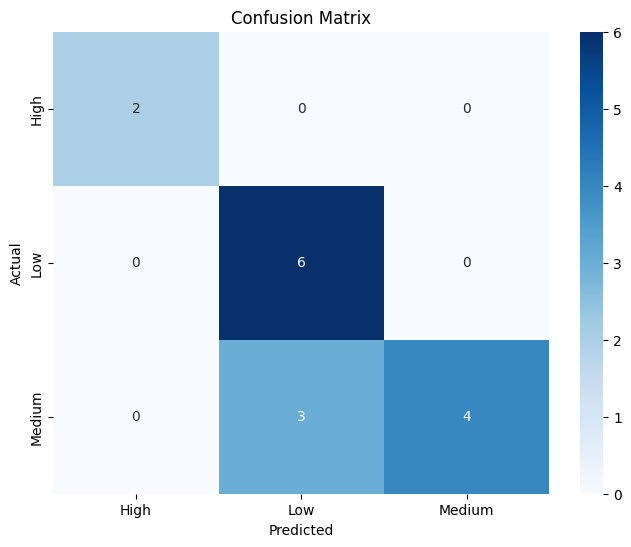

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=tree.classes_, yticklabels=tree.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Confusion matrix suggests model struggles with "High" class, favoring "Medium" predictions.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   72 non-null     int64   
 1   year                                 72 non-null     object  
 2   state_name                           72 non-null     object  
 3   state_code                           72 non-null     int64   
 4   type_residence                       72 non-null     object  
 5   total_hh                             72 non-null     float64 
 6   male_weavers                         72 non-null     float64 
 7   female_weavers                       72 non-null     float64 
 8   income_less_5000_hl_related          72 non-null     float64 
 9   income_btw_5001_10000_hl_related     72 non-null     float64 
 10  income_btw_10001_15000_hl_related    72 non-null     float64 
 11  income_btw_15001_2000

Income attribute

# decision tree classifier to predict the income category of a household based on various demographic and economic features

In [ ]:
income_columns = [
    'income_less_5000_hl_related',
    'income_btw_5001_10000_hl_related',
    'income_btw_10001_15000_hl_related',
    'income_btw_15001_20000_hl_related',
    'income_btw_20001_25000_hl_related',
    'income_btw_25001_50000_hl_related',
    'income_btw_50001_100000_hl_related',
    'income_above_100000_hl_related'
]

In [ ]:
data['Income_Category'] = pd.qcut(
    data[income_columns].sum(axis=1), 3, labels=["Low", "Medium", "High"])

In [ ]:
features = ['total_hh', 'male_weavers', 'female_weavers', 'loan', 'Sales']

In [ ]:
X = data[features]
y = data['Income_Category']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.47


In [ ]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.67      0.50      0.57         8
           2       0.17      0.50      0.25         2

    accuracy                           0.47        15
   macro avg       0.50      0.47      0.44        15
weighted avg       0.60      0.47      0.50        15



In [ ]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2 1 2]
 [1 4 3]
 [0 1 1]]


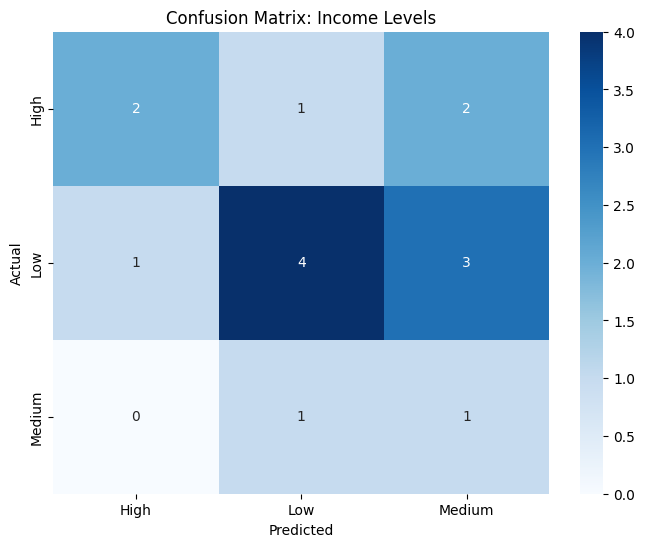

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Income Levels")
plt.show()

Model misclassifies high and low incomes, favoring middle income predictions.
